# Find Pyramids

## Introduction: Measuring pixel size
There are some example images and calculation results in the `./images` and `./results` folders, respectively. Let's load one of these images and see how it looks like.

<IPython.core.display.Javascript object>


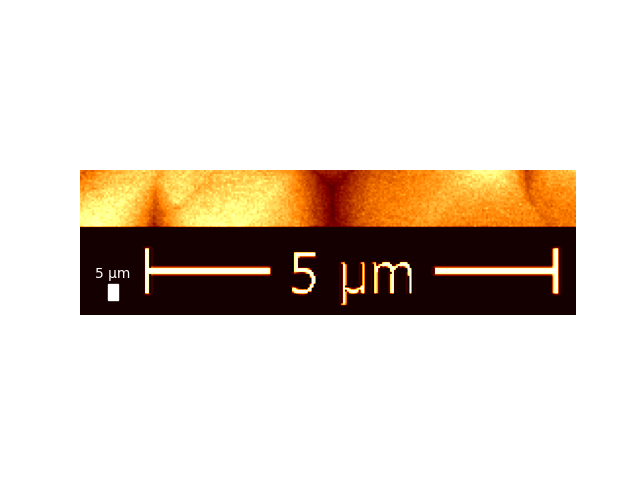

In [2]:
%matplotlib nbagg
from source import Image

image_name = '39-31 top 5kx.tif' 
#image_name = '39-58 top 5kx.tif' 
#image_name = '39-65 top 5kx.tif' 

im = Image('./images/'+image_name, autocrop=False)
f, axs = im.show()

> The pixel-size information is not set, so the scalebar (bottom left) is not correct. We can use the scalebar in the image to get the pixel-size information. For this purpose zoom on the image and note the initial and final pixel indices in the box below.

In [3]:
S  = 5.     # scalebar size in µm
x1 = 989    # right pixel of the scale bar
x0 = 780    # left ...
ps = S / (x1 - x0)

print('Pixel Size = {0:.5f} µm / pixel'.format(ps))

Pixel Size = 0.02392 µm / pixel


> Now the image can be informed of its pixel-size so we get scaled measurements.

<IPython.core.display.Javascript object>


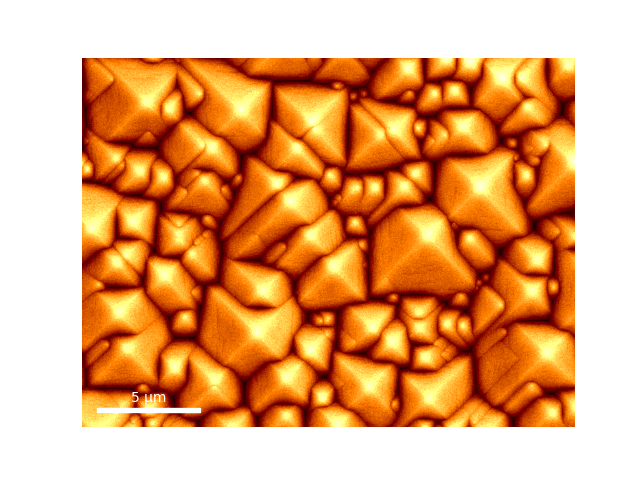

In [4]:
im = Image('./images/'+image_name, pixel_size=ps, autocrop=True)
f, axs = im.show()

## Pyramid tool
This tool has two steps, first an automatic scripts finds most of the local maxima (pyramid apices), second an interactive plot allows the user to manually correct the result. 

The automatic scripts aim to find the local maxima in the image using some fast filtering steps. Note that they only achieve partial success in finding the maxima so we need to correct the result by hand. 

What the automatic scripts do:
- Find the foreground automatically.
- Use brute force to find ALL local maxima in the foreground.
- Reduce this result to single isolated indices.
- Basin fill using watershed segmentation to obtain the color pyramids. 

An interactive plot allows to quickly correct the result. If the automatic script step was done correctly, most of the larger pyramid apices have been automatically found. Some of the more intense could show 2 or more maxima which may be wrong. Also small pyramids are very hard to automatically find. The interactive plot has some built in functionality to manually edit the result:

- Using the Left / Right click buttons we can Add / Remove points
- The watershed segmentation is repeated every time a point is Added / Removed (colors are updated accordingly).

When we are done the result can be saved. A load command is also provided to retrieve saved results. These will be showed in the boxes below.

Try it!

<IPython.core.display.Javascript object>


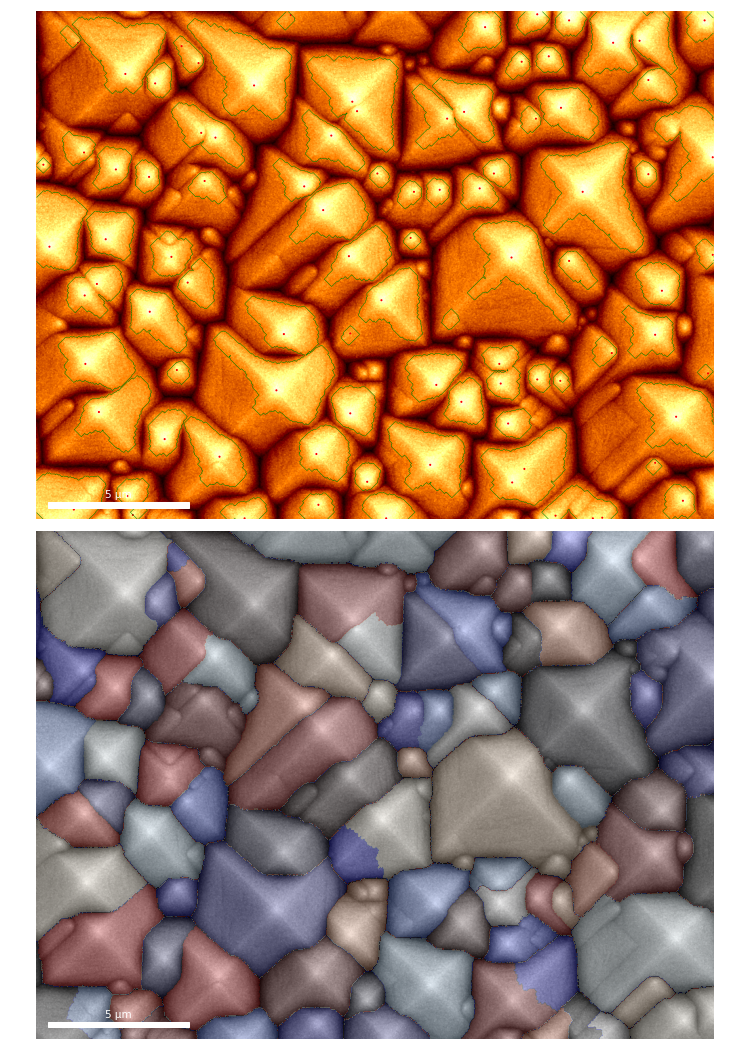

In [5]:
%matplotlib nbagg
from source import Image, PyramidTool

image_name = '39-31 top 5kx.tif' # done
#image_name = '39-58 top 5kx.tif' # done
#image_name = '39-65 top 5kx.tif' # done

im = Image('./images/'+image_name, pixel_size=0.02392)
im.median_filter(size=2)
pt = PyramidTool(im, dpi=75, figsize=(10, 14))

> When have found all the remaining pyramids and corrected the possible mistakes, the result might be saved. Saving produces a NPY file (an array of coordinates) that can be re-loaded afterwards. 

In [6]:
pt.save_coordinates('test')

In [7]:
pt.load_coordinates('test.npy')

## Measuring the Pyramids
After finding the pyramids we can proceed to measure them. This is also done by an automatic scripts that ray-traces the pyramid vertices at a given angle. The steps are as follows:

- The center of each pyramid is re-calculated to improve the results.
- An angle is provided by the user (e.g. 45 deg).
- From each pyramid center 4 rays are traced using the provided angle.
- A pyramid vertex is found where each ray touched the pyramid boundary.

This step is automatic and works really good if the pyramid segementation in the previous section was good. Try it here below with a saved result! 

In [8]:
%matplotlib nbagg

#image_name = '39-31 top 5kx.tif' # done
#image_name = '39-58 top 5kx.tif' # done
image_name = '39-65 top 5kx.tif' # done

from source import Image, PyramidTool

im = Image('./images/'+image_name, pixel_size=0.02392)
im.median_filter(size=2)
pt = PyramidTool(im, dpi=75, figsize=(10, 14))

# load saved segmentation
pt.load_coordinates('./results/'+image_name.replace('.tif', '')+' - pyramid coords.npy')

# measure the pyramids
pt.measure_pyramids(pyramid_angle=45.)

<IPython.core.display.Javascript object>

Measure pyramids can be called again in case an adjustment is desired!

In [11]:
pt.measure_pyramids(pyramid_angle=35) # this is wrong, look at the plot!

In [12]:
pt.measure_pyramids(pyramid_angle=45) # good again.

The result can be saved. This produces an NPZ file (array collection) which we can also use to re-load the results.

In [13]:
pt.save_pyramid_measurements('test')

## Reloading all results from scratch
The examples have been measured previously, the results can be re-loaded here. If the  Try running the code-box below!

While the figures are interactive, they can be saved to disk in various formats using the save button below each image. After closing them with the "power off button", they figures can still be saved from the browser in PNG format.

<IPython.core.display.Javascript object>


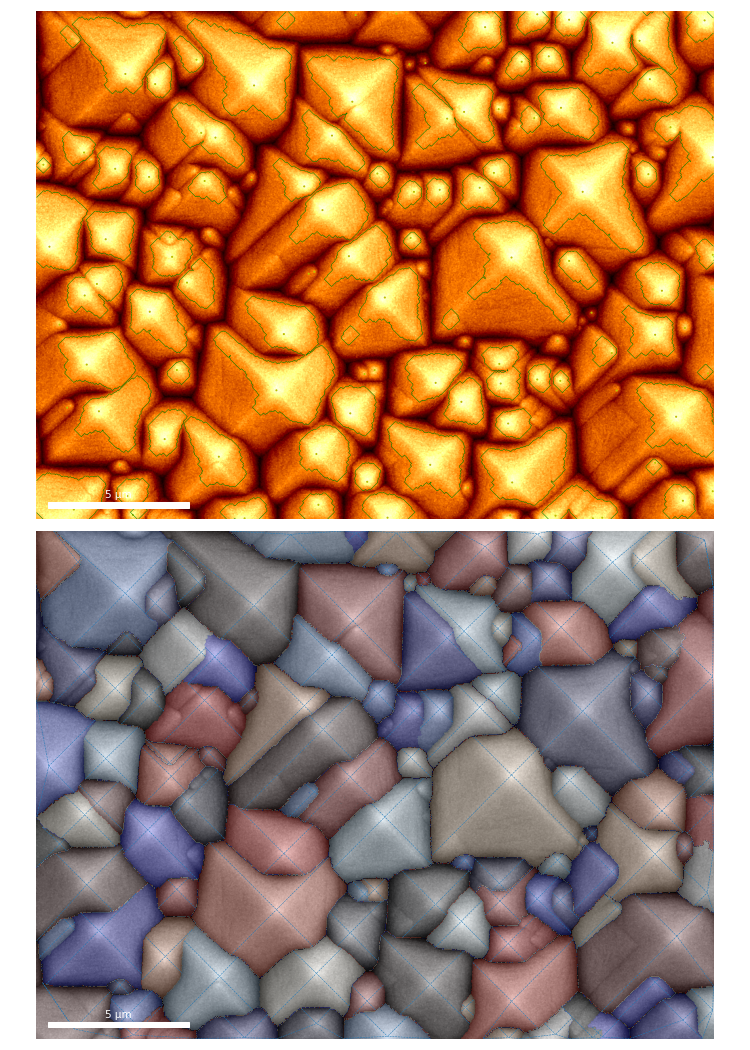

<IPython.core.display.Javascript object>


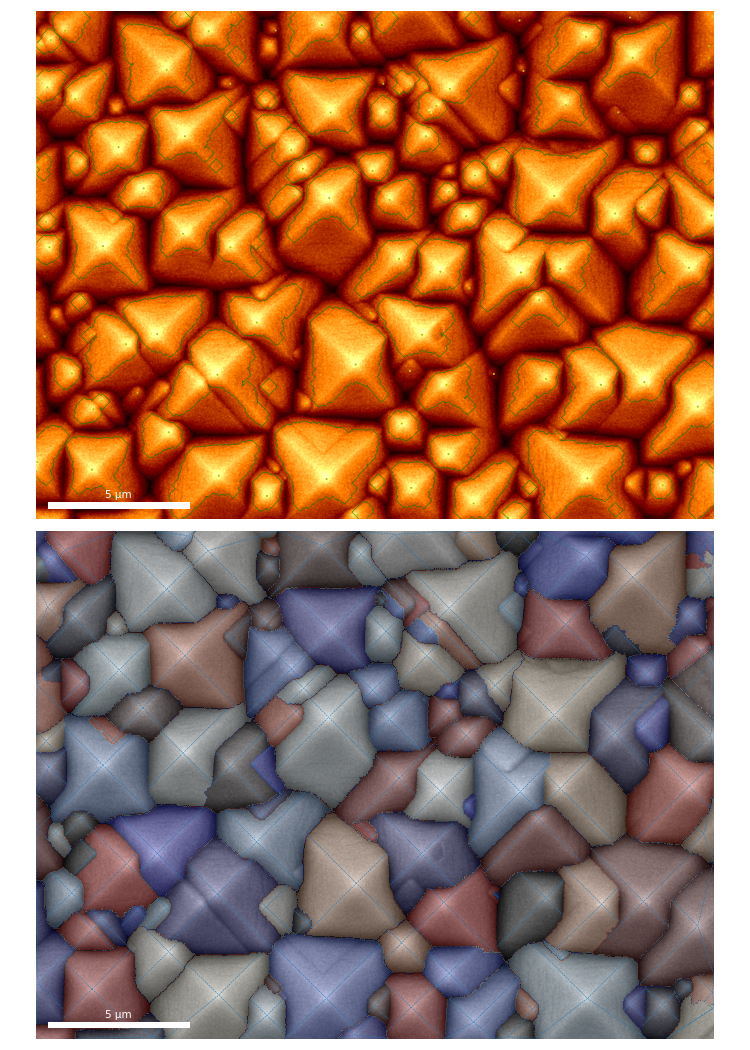

<IPython.core.display.Javascript object>


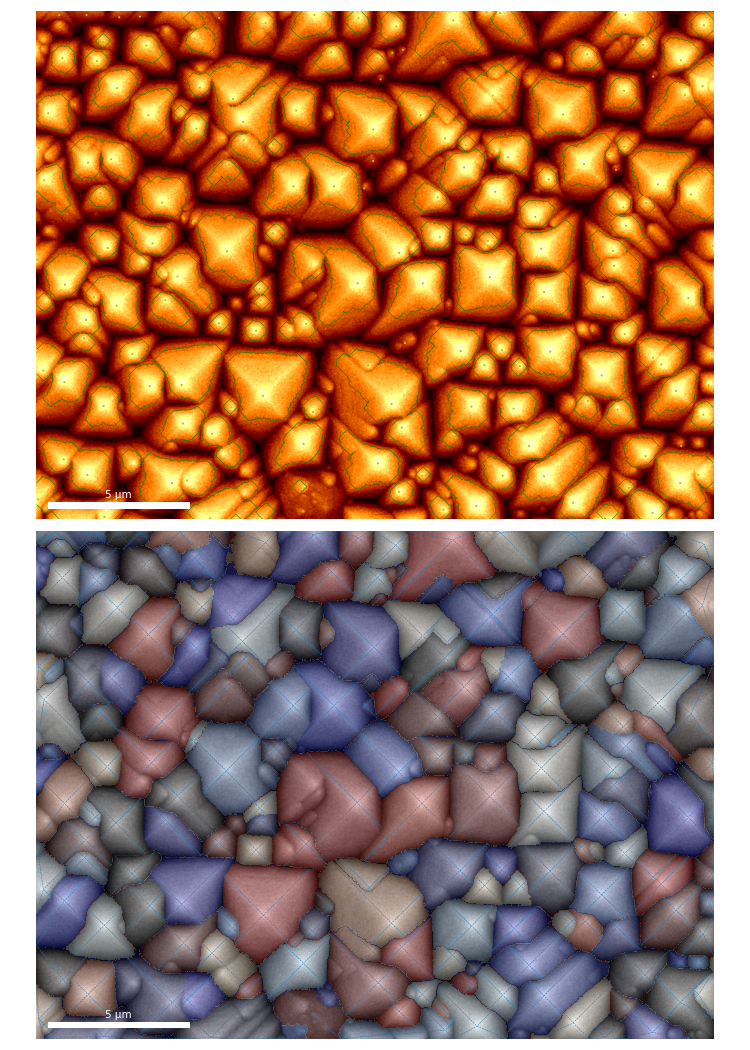

In [14]:
%matplotlib nbagg
from source import Image, PyramidTool

image_names =[
    '39-31 top 5kx.tif',
    '39-58 top 5kx.tif',
    '39-65 top 5kx.tif', ] 

for image_name in image_names:
    
    im = Image('./images/'+image_name, pixel_size=0.02392)
    im.median_filter(size=2)
    pt = PyramidTool(im, dpi=75, figsize=(10, 14))

    # load saved segmentation
    pt.load_coordinates('./results/'+image_name.replace('.tif', '')+' - pyramid coords.npy')

    # load saved measurement
    pt.load_pyramid_measurements('./results/'+image_name.replace('.tif', '')+' - pyramid measurements.npz')

# Measuring pyramid properties
The vertex measurements can be now analysed. Here are only some examples...

## Histogram vertex sizes

<IPython.core.display.Javascript object>


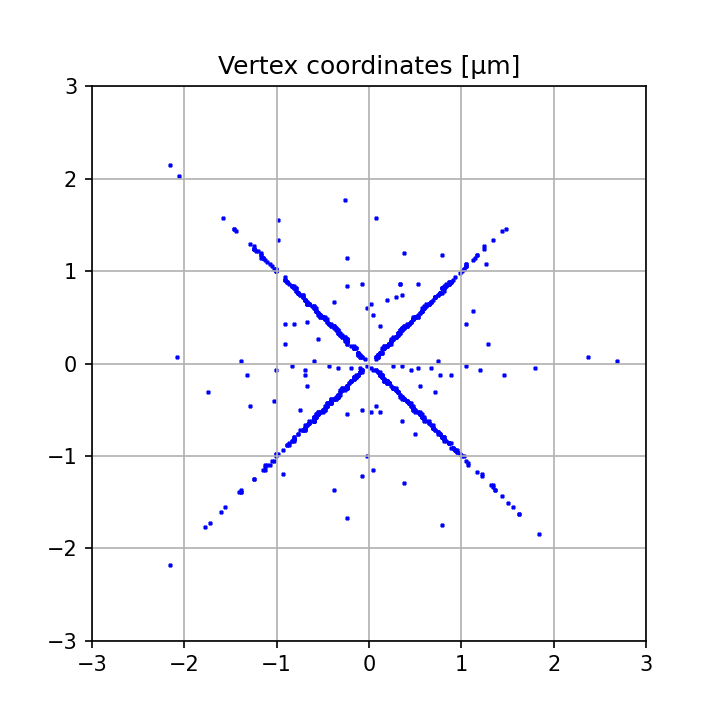

<IPython.core.display.Javascript object>


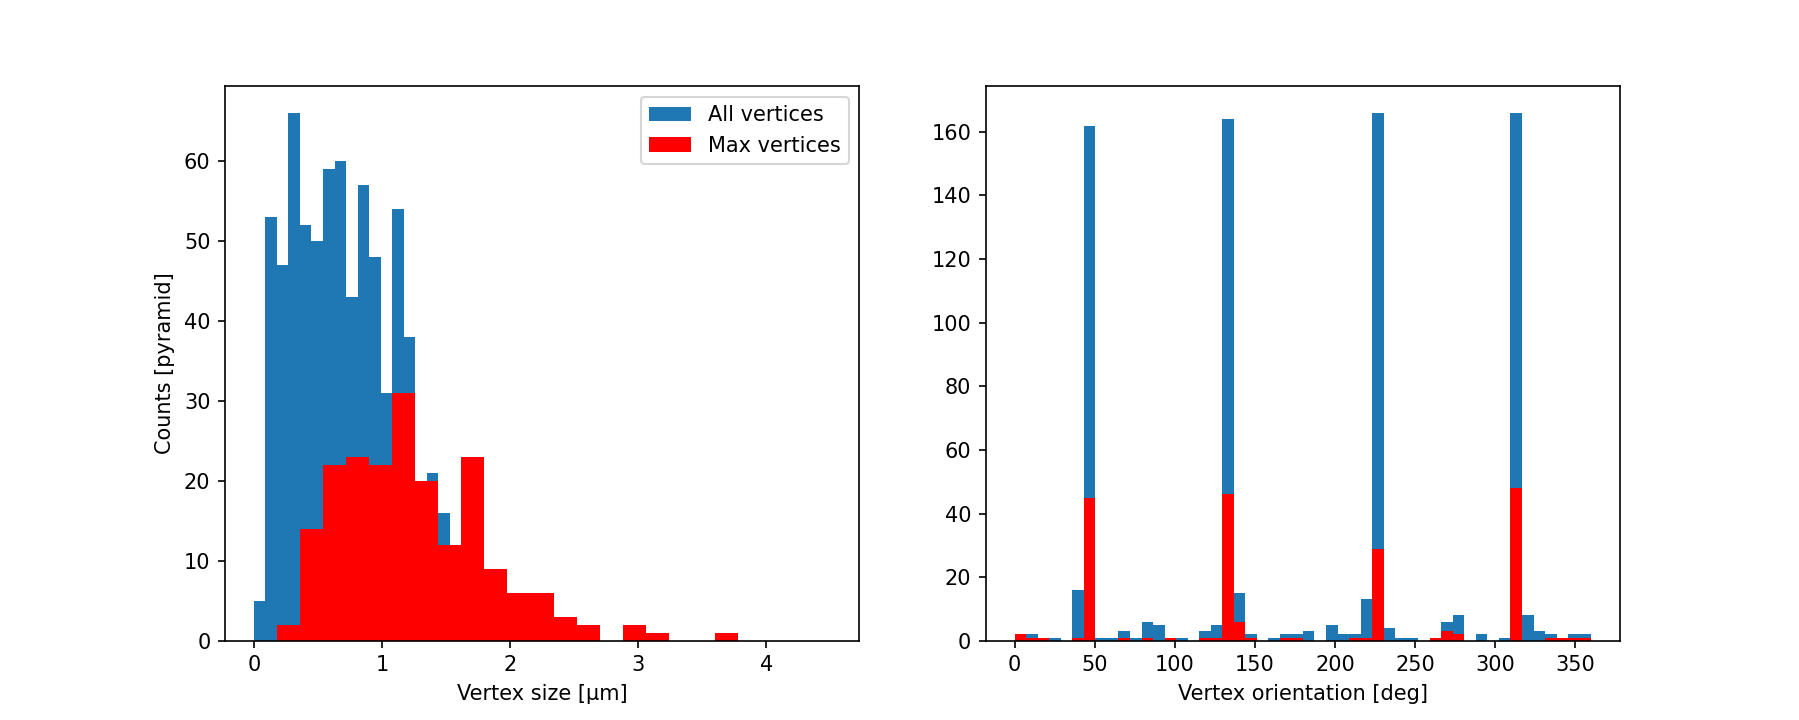

In [16]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np

#image_name = '39-31 top 5kx.tif' # done
#image_name = '39-58 top 5kx.tif' # done
image_name = '39-65 top 5kx.tif' # done

ps = 0.02392 # pixel-size µm / pixel


sname = './results/' + image_name.replace('.tif',' - pyramid measurements.npz')
vertices = np.load(sname)['vertices']
moduli = np.sqrt(np.sum(vertices**2, -1)) * ps
angles = np.arctan2(vertices[..., 1], vertices[..., 0])
max_indices = np.argmax(moduli, -1)
moduli_max = np.array([moduli[io, idx] for io, idx in enumerate(max_indices)])
angles_max = np.array([angles[io, idx] for io, idx in enumerate(max_indices)])
angles_max_deg = np.rad2deg(angles_max+np.pi)
angles_deg = np.rad2deg(angles+np.pi)

v_plt = vertices.reshape(-1, 2)

# plot 1
figsize = plt.figaspect(1)
f, ax = plt.subplots(dpi=150., figsize=figsize)
ax.scatter(v_plt[:, 1]*ps, v_plt[:, 0]*ps, s=5, c='b', marker='+')
ax.set_ylim(-3., +3.)
ax.set_xlim(-3., +3.)
ax.grid('on')
ax.set_aspect('equal')
ax.set_title('Vertex coordinates [µm]')
sname = image_name.replace('.tif',' - vertex coords.png')
f.savefig(sname)

# plot 2
figsize = plt.figaspect(1/2.5)
f, axs = plt.subplots(1, 2, dpi=150., figsize=figsize)

ax = axs[0]
ax.hist(moduli.reshape(-1), bins=50, range=(0., 4.5), label='All vertices')
ax.hist(moduli_max, bins=25, range=(0., 4.5), color='r', label='Max vertices')
ax.set_xlabel('Vertex size [µm]')
ax.set_ylabel('Counts [pyramid]')
ax.legend()

ax = axs[1]
ax.hist(angles_deg.reshape(-1), bins=50, range=(0., 360.))
ax.hist(angles_max_deg, bins=50, range=(0., 360.), color='r')
ax.set_xlabel('Vertex orientation [deg]')

sname = image_name.replace('.tif',' - vertex stats.png')
f.savefig(sname)

## Histogram vertex properties - height

<IPython.core.display.Javascript object>


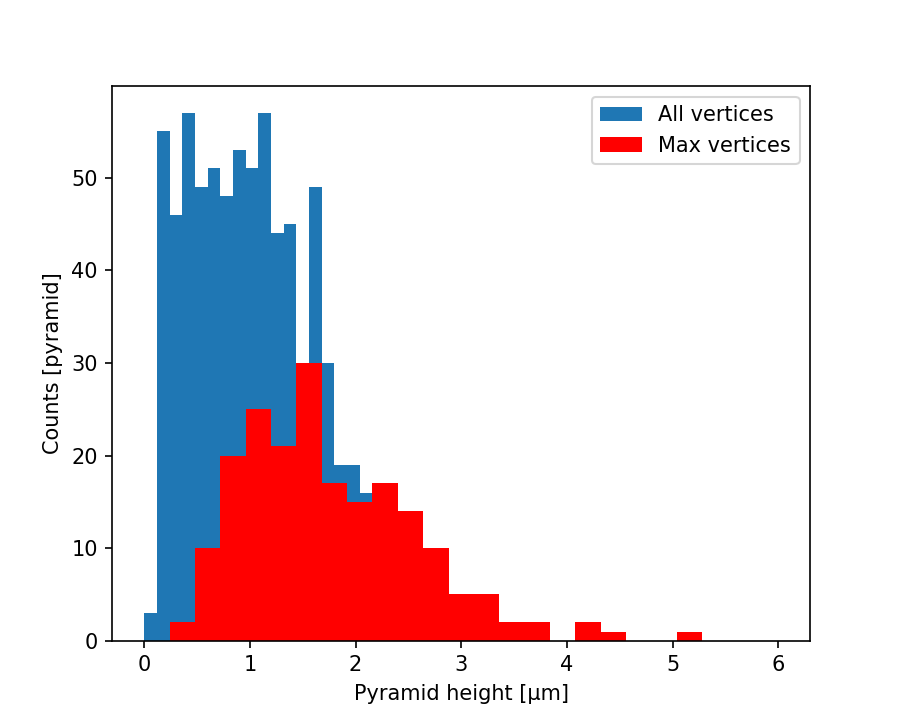

In [17]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np

#image_name = '39-31 top 5kx.tif' # done
#image_name = '39-58 top 5kx.tif' # done
image_name = '39-65 top 5kx.tif' # done

ps = 0.02392 # pixel-size µm / pixel
angle = 54.7

sname = './results/' + image_name.replace('.tif',' - pyramid measurements.npz')
vertices = np.load(sname)['vertices']
moduli = np.sqrt(np.sum(vertices**2, -1)) * ps
height = np.tan(np.deg2rad(angle)) * moduli
max_indices = np.argmax(moduli, -1)
height_max = np.array([height[io, idx] for io, idx in enumerate(max_indices)])


figsize = plt.figaspect(0.8)
f, ax = plt.subplots(dpi=150., figsize=figsize)

Rbins = (0., 6.)
ax.hist(height.reshape(-1), bins=50, range=Rbins, label='All vertices')
ax.hist(height_max, bins=25, range=Rbins, color='r', label='Max vertices')
ax.set_xlabel('Pyramid height [µm]')
ax.set_ylabel('Counts [pyramid]')
ax.legend()

sname = image_name.replace('.tif',' - Pyramid height.png')
f.savefig(sname)

## Export vertex sizes and orientations to excel tables

In [19]:
import numpy as np

ps = 0.02392 # pixel-size µm / pixel

image_names = [
    '39-31 top 5kx.tif', 
    '39-58 top 5kx.tif', 
    '39-65 top 5kx.tif', ]

angle = 54.7

for image_name in image_names:
    sname = './results/' + image_name.replace('.tif',' - pyramid measurements.npz')
    vertices = np.load(sname)['vertices']
    moduli = np.sqrt(np.sum(vertices**2, -1)) * ps
    angles = np.arctan2(vertices[..., 1], vertices[..., 0])
    max_indices = np.argmax(moduli, -1)
    moduli_max = np.array([moduli[io, idx] for io, idx in enumerate(max_indices)])
    angles_max = np.array([angles[io, idx] for io, idx in enumerate(max_indices)])
    angles_max_deg = np.rad2deg(angles_max+np.pi)
    height_max = np.tan(np.deg2rad(angle))*moduli_max
    sname = './results/' + image_name.replace('.tif', '- pyramid measurements.csv')
    np.savetxt(
        fname = sname, 
        X = np.stack([moduli_max, angles_max_deg, height_max], axis=1),
        fmt = '%.5f',
        delimiter = ',',
        header='# Modulus [um], Orientation [deg], Height [um]', 
        comments='# Original image name: {0:s} \n# Pixel Size = {1:.5f} um / pixel \n'.format(image_name, ps), )